# Setup

In [82]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Activity 1:

In [63]:
img = cv.imread('boat.jpg')
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, th3 = cv.threshold(img_grayscale, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
invert = cv.bitwise_not(th3)
res = cv.bitwise_and(img, img, mask = invert)

img_copy = res.copy()
pt1 = (300, 340)
pt2 = (690, 480)
cv.rectangle(img_copy, pt1, pt2, (255, 255, 255), 2, cv.LINE_AA)

cv.imshow('Original', img)
cv.imshow('Otsu', th3)
cv.imshow('Inverted Otsu', invert)
cv.imshow('Rectangle', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Activity 2:

In [76]:
img = cv.imread('leaf.jfif', 0)
blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

def trackbar(x):
    erosion = cv.erode(img_binary, np.ones((x,x), np.uint8), iterations = 1)
    dilation = cv.dilate(img_binary, np.ones((x,x), np.uint8), iterations = 1)
    opening = cv.morphologyEx(img_binary, cv.MORPH_OPEN, np.ones((x,x), np.uint8))
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, np.ones((x,x), np.uint8))
    
    cv.imshow('window', np.hstack([erosion, dilation, opening, closing]))

#cv.imshow('Original', img)
#cv.imshow('Otsu', img_binary)
cv.namedWindow('window')
cv.createTrackbar('Morphological', 'window', 1, 10, trackbar)
cv.waitKey(0)
cv.destroyAllWindows()

## Activity 3:

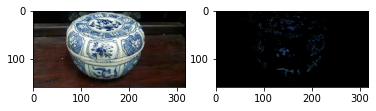

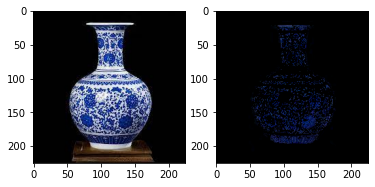

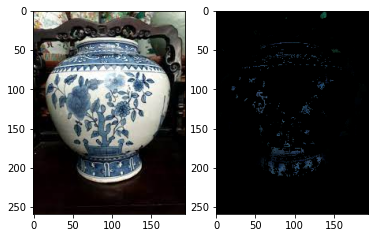

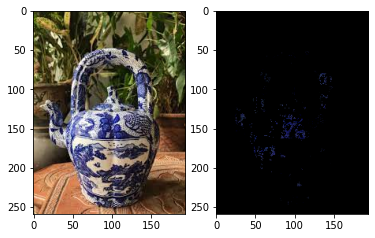

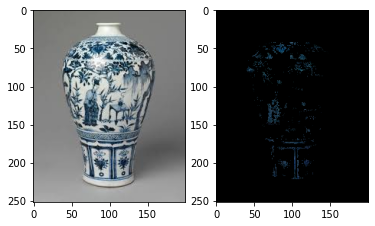

In [89]:
for i in range (1, 6):
    img_name = 'porcelain' + str(i) + '.jfif'
    img = cv.imread(img_name)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    blue_low = (70, 120, 0)
    blue_high = (120, 255, 120)
    
    mask = cv.inRange(img_hsv, blue_low, blue_high)
    res = cv.bitwise_and(img, img, mask = mask)
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(res)
    plt.show()